# Brain Tumar Detection(MRI) Model
To Detect and Classify Brain Tumor using Support Vector Machine Clasifier .
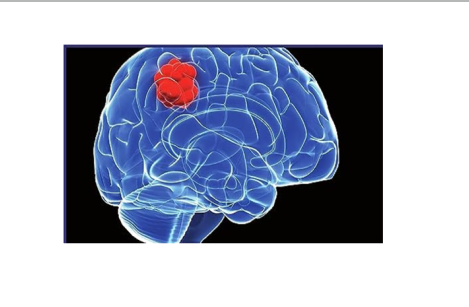

                                                                          By - Jagruti Ramesh Mali 

Guided By :
Deepak Sir 

External :
    

# Importing Necessary Libraries

In [1]:
#necessary Libraries 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score

# Load & Prepare Data

In [2]:
# Define the path to the training data directory
path = os.listdir("C:\\machine learning\\My_Project_TUmar_Detection\\data set\\Training")
# Define classes (labels)
classes = {'no_tumor':0,'pituitary_tumor':1}

# Preprocess Data

In [3]:
#loading the data
X = [] # To store images
Y = []  # To store corresponding labels

# Loop through each class (folder)
for cls in classes:
    pth = "C:\\machine learning\\My_Project_TUmar_Detection\\data set\\Training\\"+cls
    # Loop through image files in the class folder
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0) # Read image in grayscale
        img = cv2.resize(img, (200,200))# Resize image to a consistent size
        X.append(img)# Add preprocessed image to X
        Y.append(classes[cls]) # Add label to Y

In [4]:
# Load and preprocess data
X = np.array(X)
Y = np.array(Y)

# Reshape the data to flatten the images
X_updated = X.reshape(len(X), -1)

In [5]:
# Display the counts of each class in the dataset
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [6]:
# Check the shapes of X and Y
X.shape, Y.shape

((1222, 200, 200), (1222,))

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize Data

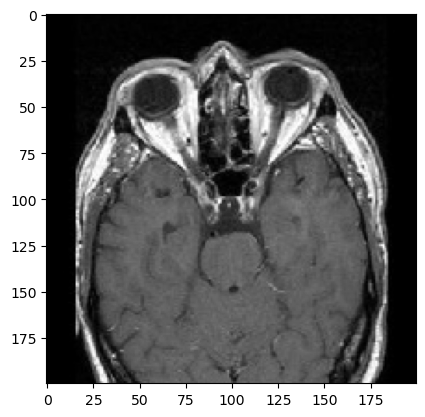

In [8]:
# Visualize the first preprocessed image
plt.imshow(X[0], cmap='gray')

In [9]:
# Reshape X for consistency
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data

In [10]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, test_size=0.2,random_state=42)

In [11]:
#checking shape
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((977, 40000), (245, 40000), (977,), (245,))

# Feature Scaling

In [12]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.transform(xtest)

# SVC With kernel Linear

In [13]:
# Create and train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)# Create and train an SVM model with a linear kernel
svm_model.fit(xtrain_sc, ytrain)
svm_model.score(xtest_sc,ytest)# Calculate and print the testing accuracy

0.9591836734693877

In [14]:
# Make predictions using the trained model
ypred = svm_model.predict(xtest_sc)
ypred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

# Accuracy

In [15]:
# Calculate and print the training 
print("Training Score:", svm_model.score(xtrain_sc, ytrain))

Training Score: 1.0


In [16]:
# Calculate and print the testing accuracy
accuracy = svm_model.score(xtest_sc, ytest)
print("Testing Score:",accuracy)

Testing Score: 0.9591836734693877


# Confusion Matrix

In [17]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

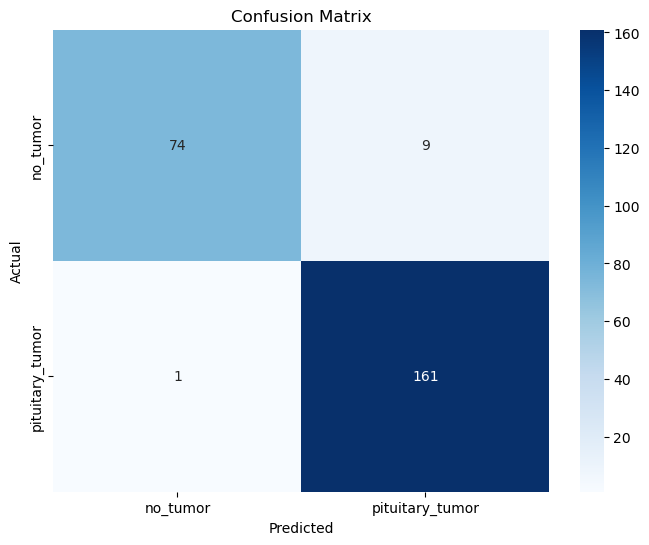

In [18]:
# Display confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### classification report

In [19]:
# Print a classification report that includes precision, recall, and F1-score
print("Classification Report:")
print(classification_report(ytest, ypred, target_names=classes))

Classification Report:
                 precision    recall  f1-score   support

       no_tumor       0.99      0.89      0.94        83
pituitary_tumor       0.95      0.99      0.97       162

       accuracy                           0.96       245
      macro avg       0.97      0.94      0.95       245
   weighted avg       0.96      0.96      0.96       245



# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Create a Logistic Regression model with regularization parameter C=1
lg = LogisticRegression(C=1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=1)

In [21]:
ypred_lg = lg.predict(xtest)# Make predictions on the test set
lg.predict_proba(xtest)# Predict probabilities for each class

array([[1.00000000e+00, 4.55362503e-10],
       [1.49371759e-09, 9.99999999e-01],
       [1.00000000e+00, 1.30312722e-11],
       [1.44328993e-13, 1.00000000e+00],
       [2.20222382e-07, 9.99999780e-01],
       [1.16284760e-11, 1.00000000e+00],
       [5.14091303e-09, 9.99999995e-01],
       [9.99999978e-01, 2.19410102e-08],
       [9.31534263e-08, 9.99999907e-01],
       [6.50151668e-08, 9.99999935e-01],
       [9.99999845e-01, 1.54906704e-07],
       [8.04669998e-07, 9.99999195e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.46607007e-07, 9.99999853e-01],
       [1.90204751e-06, 9.99998098e-01],
       [1.02109642e-08, 9.99999990e-01],
       [5.10627999e-08, 9.99999949e-01],
       [1.91353972e-06, 9.99998086e-01],
       [1.00000000e+00, 4.22178948e-20],
       [6.56262156e-10, 9.99999999e-01],
       [5.61873426e-06, 9.99994381e-01],
       [8.42378238e-06, 9.99991576e-01],
       [6.47646949e-02, 9.35235305e-01],
       [4.31406357e-07, 9.99999569e-01],
       [1.290394

In [22]:
# Calculate and print the accuracy of the Logistic Regression model
lg_score=lg.score(xtest,ytest)
lg_score

0.9306122448979591

# Sigmoid Function

The sigmoid function is used to visualize its behavior and transformation of input values.

In [23]:
# Define the sigmoid function
import math
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
# Generate values for the sigmoid function
x_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x_values)

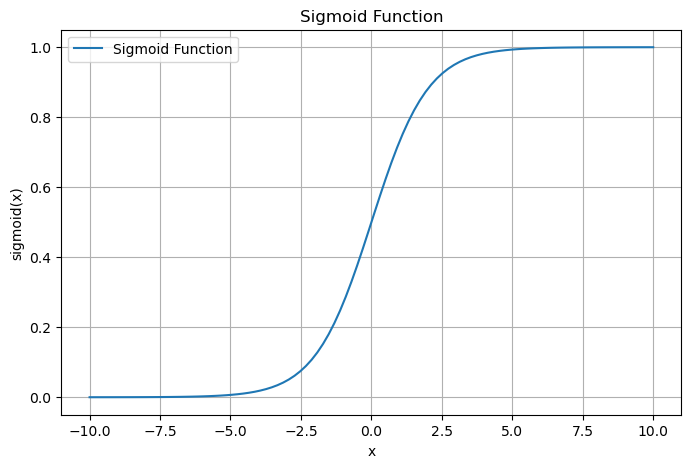

In [25]:
# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(x_values, sigmoid_values, label="Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrix

In [26]:
# Generate a confusion matrix for Logistic Regression predictions
conf_matrix = confusion_matrix(ytest, ypred_lg)

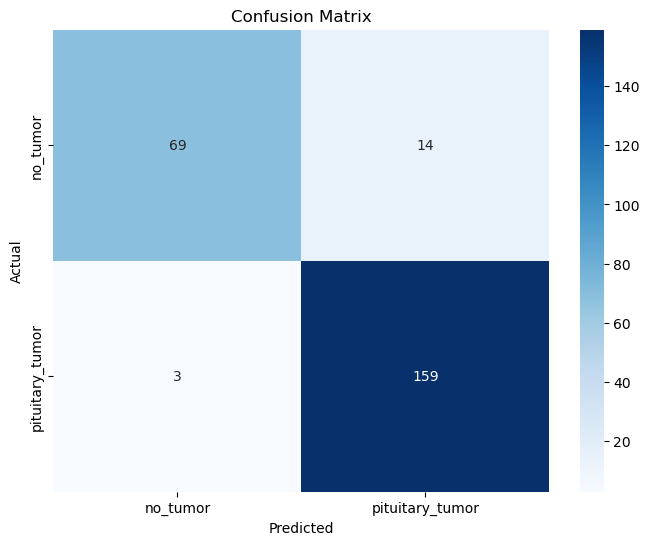

In [27]:
# Display confusion matrix as a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### classification report

In [28]:
# Print a classification report that includes precision, recall, and F1-score
print("Classification Report:")
print(classification_report(ytest, ypred_lg, target_names=classes))

Classification Report:
                 precision    recall  f1-score   support

       no_tumor       0.96      0.83      0.89        83
pituitary_tumor       0.92      0.98      0.95       162

       accuracy                           0.93       245
      macro avg       0.94      0.91      0.92       245
   weighted avg       0.93      0.93      0.93       245



## K-Fold & Cross-validation

In [29]:
# Create a k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation for SVM and Logistic Regression
scores_svm = cross_val_score(svm_model, xtrain_sc, ytrain, cv=kf)
scores = cross_val_score(lg, xtrain_sc, ytrain, cv=kf)

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores_svm)
svm_kfold_mean_score = np.mean(scores_svm)
print("Mean Accuracy of svm :",svm_kfold_mean_score )
print("Cross-validation scores:", scores)
lg_kfold_mean_score = np.mean(scores)
print("Mean Accuracy of lg :",lg_kfold_mean_score )


Cross-validation scores: [0.96938776 0.97959184 0.93333333 0.96410256 0.97948718]
Mean Accuracy of svm : 0.9651805337519624
Cross-validation scores: [0.95918367 0.97959184 0.93846154 0.96410256 0.97948718]
Mean Accuracy of lg : 0.9641653584510728


# CNN Algorithm

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [31]:
# Reshape the data for CNN
X_cnn = X.reshape(X.shape[0], 200, 200, 1)
Y_cnn = Y

In [32]:
# Split the data into training and testing sets for CNN
xtrain_cnn, xtest_cnn, ytrain_cnn, ytest_cnn = train_test_split(X_cnn, Y_cnn, random_state=42, test_size=0.2)


In [33]:
# Define the CNN architecture and train the model

cnn_model = Sequential()

# Add convolutional layers with max pooling
cnn_model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
# Flatten the data and add fully connected layers
cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with an optimizer, loss function, and metrics
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
# Train the CNN model on the training data
cnn_model.fit(xtrain_cnn, ytrain_cnn, epochs=10, batch_size=32)


Epoch 1/10
31/31 [==============================] - 36s 1s/step - loss: 89.5138 - accuracy: 0.6469
Epoch 2/10
31/31 [==============================] - 33s 1s/step - loss: 0.3234 - accuracy: 0.8956
Epoch 3/10
31/31 [==============================] - 33s 1s/step - loss: 0.1536 - accuracy: 0.9406
Epoch 4/10
31/31 [==============================] - 33s 1s/step - loss: 0.1242 - accuracy: 0.9488
Epoch 5/10
31/31 [==============================] - 34s 1s/step - loss: 0.0850 - accuracy: 0.9683
Epoch 6/10
31/31 [==============================] - 34s 1s/step - loss: 0.0922 - accuracy: 0.9693
Epoch 7/10
31/31 [==============================] - 34s 1s/step - loss: 0.0483 - accuracy: 0.9775
Epoch 8/10
31/31 [==============================] - 34s 1s/step - loss: 0.0338 - accuracy: 0.9867
Epoch 9/10
31/31 [==============================] - 35s 1s/step - loss: 0.0241 - accuracy: 0.9877
Epoch 10/10
31/31 [==============================] - 35s 1s/step - loss: 0.0171 - accuracy: 0.9898


In [36]:
# Evaluate the CNN model on the test data
cnn_score = cnn_model.evaluate(xtest_cnn, ytest_cnn)
print("CNN Model Accuracy:", cnn_score[1])# Print the CNN model accuracy

8/8 [==============================] - 3s 275ms/step - loss: 0.0758 - accuracy: 0.9673
CNN Model Accuracy: 0.9673469662666321


In [37]:
# Make predictions using the CNN model
cnn_predictions = cnn_model.predict(xtest_cnn)
cnn_ypred = np.round(cnn_predictions).astype(int)

8/8 [==============================] - 3s 265ms/step


In [38]:
# Calculate and print the accuracy of the CNN model
cnn_accuracy = accuracy_score(ytest_cnn, cnn_ypred)
print("CNN Model Accuracy:", cnn_accuracy)

CNN Model Accuracy: 0.9673469387755103


# Confusion Matrix

In [39]:
# Generate a confusion matrix for the CNN model predictions
conf_matrix = confusion_matrix(ytest_cnn, cnn_ypred)

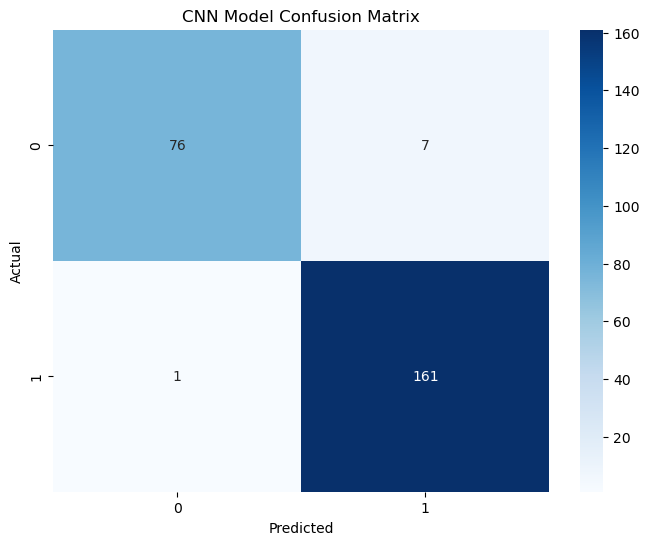

In [40]:
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Model Confusion Matrix")
plt.show()

### Classification Report

In [41]:
# Print a classification report that includes precision, recall, and F1-score
print("Classification Report:")
print(classification_report(ytest_cnn, cnn_ypred, target_names=classes))

Classification Report:
                 precision    recall  f1-score   support

       no_tumor       0.99      0.92      0.95        83
pituitary_tumor       0.96      0.99      0.98       162

       accuracy                           0.97       245
      macro avg       0.97      0.95      0.96       245
   weighted avg       0.97      0.97      0.97       245



## Understand test data

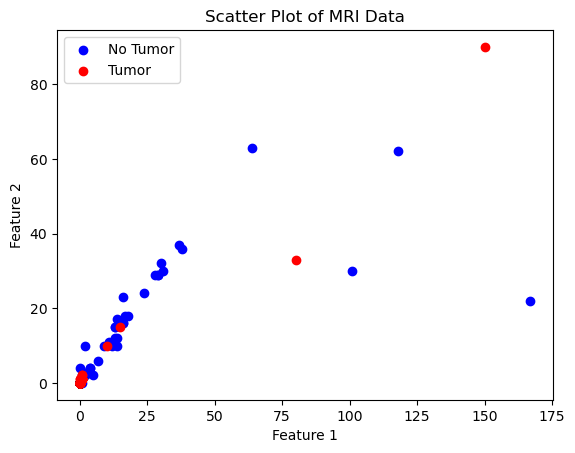

In [42]:
# Display the scatter plot of test data
no_tumor_indices = np.where(ytest == 0)[0]
tumor_indices = np.where(ytest == 1)[0]

plt.scatter(xtest[no_tumor_indices, 0], xtest[no_tumor_indices, 1], c='blue', label='No Tumor')
plt.scatter(xtest[tumor_indices, 0], xtest[tumor_indices, 1], c='red', label='Tumor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter Plot of MRI Data')
plt.show()


 the scatter plot of test data is used to visualize the distribution of test samples in a two-dimensional feature space This can be helpful for understanding how well the model is separating the two classes (tumor and no tumor) and if there is any overlap in the feature space.

### PCA

In [43]:
from sklearn.decomposition import PCA


In [44]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust the number of components
xtrain_pca = pca.fit_transform(xtrain_sc)
xtest_pca = pca.transform(xtest_sc)


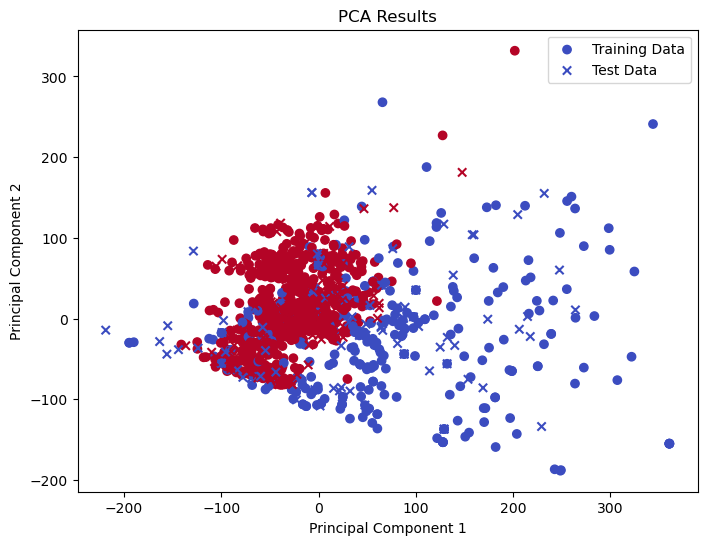

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(xtrain_pca[:, 0], xtrain_pca[:, 1], c=ytrain, cmap='coolwarm', label='Training Data')
plt.scatter(xtest_pca[:, 0], xtest_pca[:, 1], c=ytest, cmap='coolwarm', marker='x', label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Results')
plt.show()


In [46]:
# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.1605905  0.09354691]


In [47]:
# SVM with PCA-transformed data

# Create and train an SVM model with a linear kernel on PCA-transformed data
svm_model_pca = SVC(kernel='linear', C=1)
svm_model_pca.fit(xtrain_pca, ytrain)

# Calculate and print the accuracy of the SVM model with PCA
score_linear_pca = svm_model_pca.score(xtest_pca, ytest)
print("SVM with Linear Kernel (PCA):", score_linear_pca)


SVM with Linear Kernel (PCA): 0.8408163265306122


PCA reduces the dimensionality of the data, which might lead to some loss of information. Adjust the number of components based on your preference and the balance between dimensionality reduction and model performance.

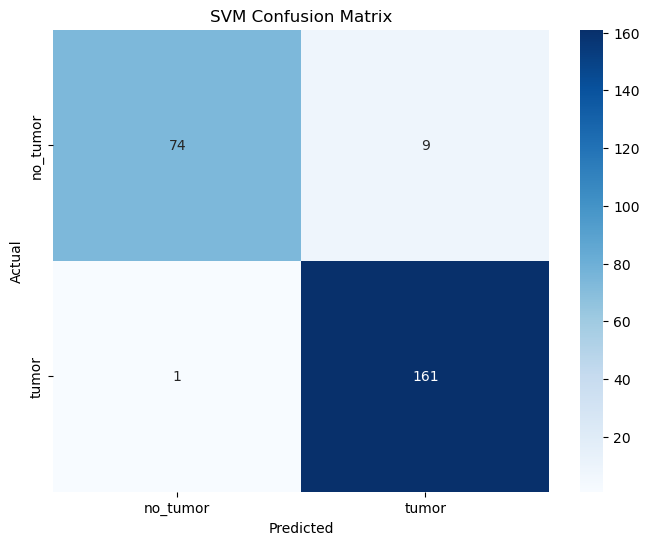

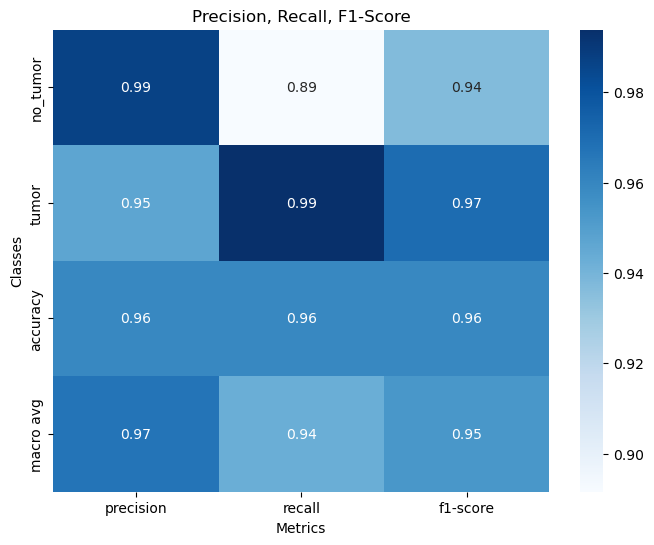

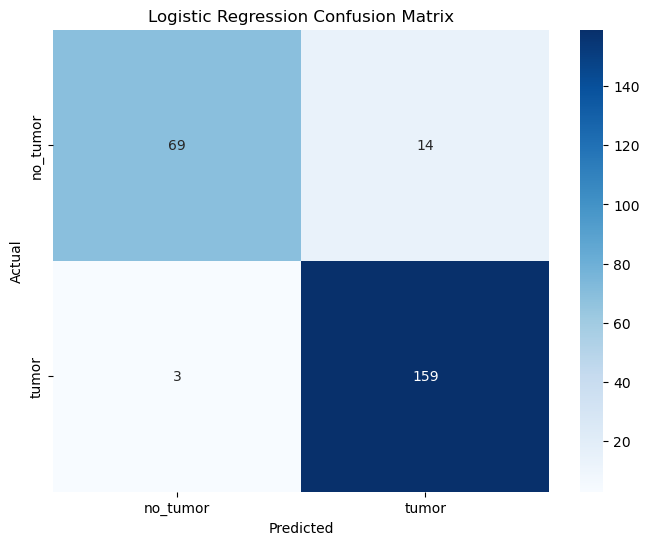

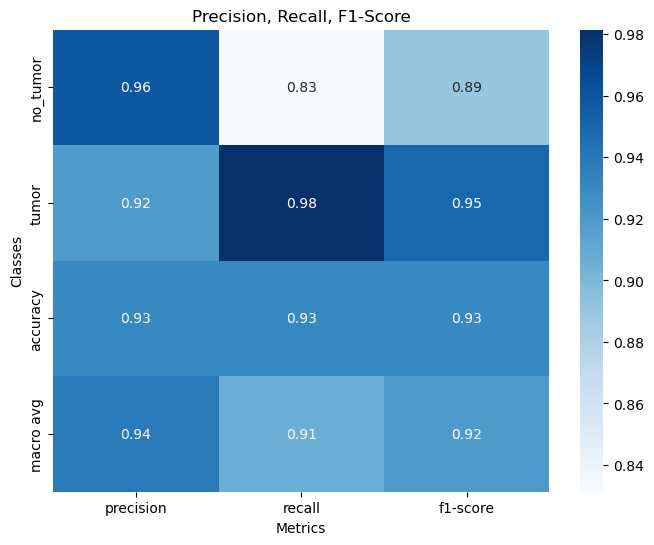

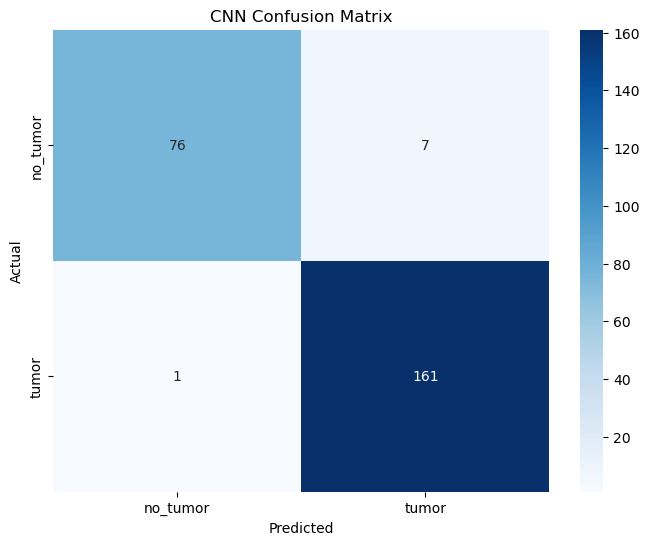

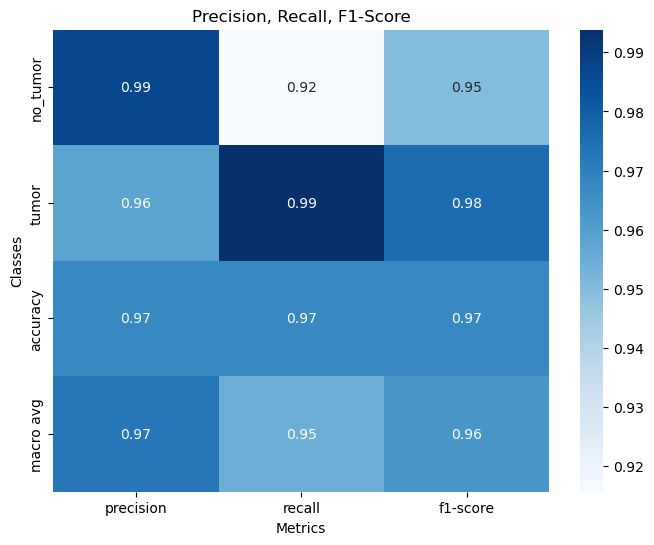

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Function to plot classification report metrics (precision, recall, f1-score)
def plot_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    df = pd.DataFrame(report).transpose()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.iloc[:-1, :3], annot=True, cmap="Blues", fmt=".2f")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
    plt.title("Precision, Recall, F1-Score")
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(ytest, ypred, classes=["no_tumor", "tumor"], title="SVM Confusion Matrix")

# Plot classification report metrics for SVM
plot_classification_report(ytest, ypred, target_names=["no_tumor", "tumor"])

# You can repeat the same process for Logistic Regression and CNN models.

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(ytest, ypred_lg, classes=["no_tumor", "tumor"], title="Logistic Regression Confusion Matrix")

# Plot classification report metrics for Logistic Regression
plot_classification_report(ytest, ypred_lg, target_names=["no_tumor", "tumor"])

# Plot confusion matrix for CNN
plot_confusion_matrix(ytest_cnn, cnn_ypred, classes=["no_tumor", "tumor"], title="CNN Confusion Matrix")

# Plot classification report metrics for CNN
plot_classification_report(ytest_cnn, cnn_ypred, target_names=["no_tumor", "tumor"])


# Comparison of various methods' accuracy

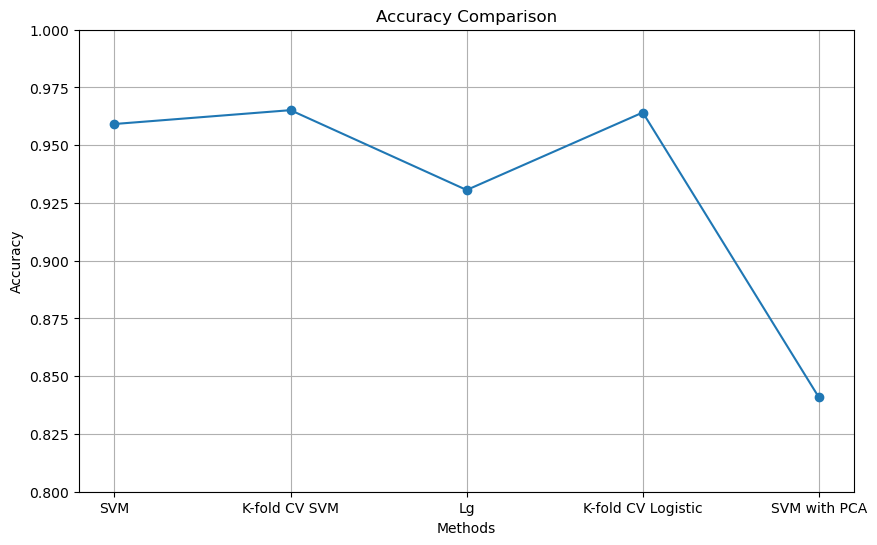

In [49]:
# Create lists for labels and corresponding scores
labels = ['SVM', 'K-fold CV SVM','Lg', 'K-fold CV Logistic','SVM with PCA']
scores = [accuracy,svm_kfold_mean_score,lg_score,lg_kfold_mean_score,score_linear_pca]

plt.figure(figsize=(10, 6))
plt.plot(labels, scores, marker='o')
plt.title('Accuracy Comparison')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)  # Adjust the y-axis limits if needed
plt.grid(True)
plt.show()

# Predict result

In [50]:
# Create a dictionary to map class indices to class names
classes = {0:'no_tumor',1:'pituitary_tumor'}

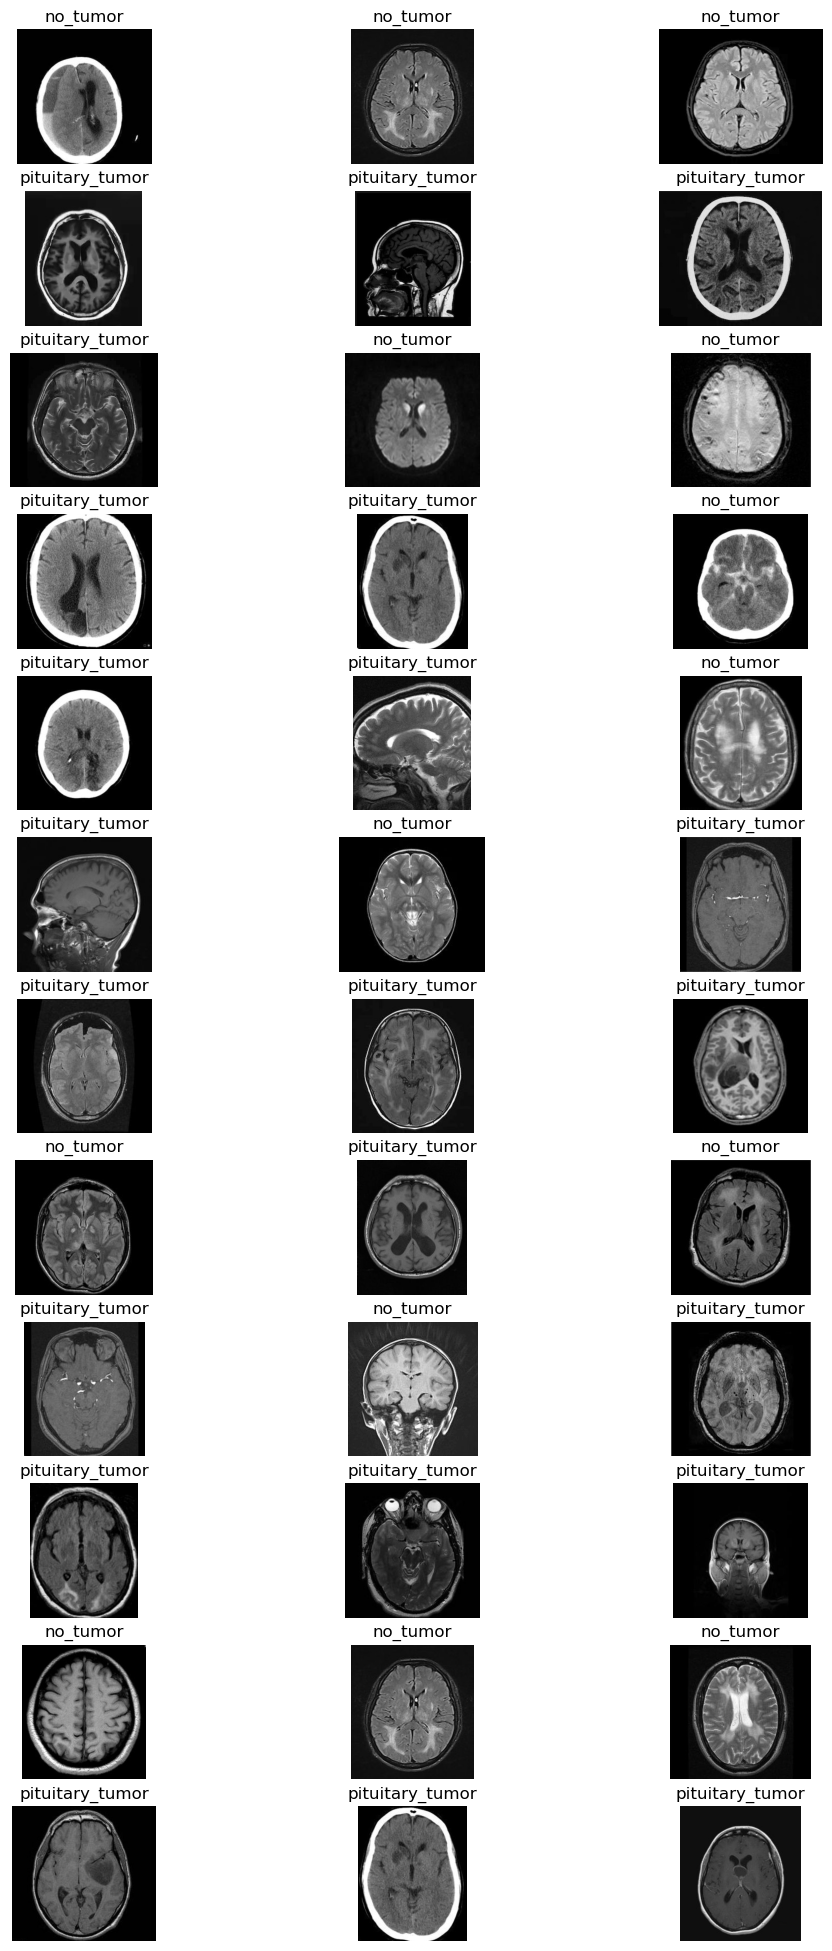

In [51]:
# Load and predict using test images
#Provide a path to a test image and predict tumor presence based on a given image by its class
plt.figure(figsize=(12,50))
p = os.listdir("C:\\machine learning\\My_Project_TUmar_Detection\\data set\\Testing\\")
c=1
for i in os.listdir("C:\\machine learning\\My_Project_TUmar_Detection\\data set\\Testing\\no_tumor/")[0:36]:
    plt.subplot(24,3,c)
    img = cv2.imread("C:\\machine learning\\My_Project_TUmar_Detection\\data set\\Testing\\no_tumor/"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = svm_model.predict(img1)
    plt.title(classes[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

### Final Output

In [52]:
# Check if all elements in the second row of the first image are equal to 1 
#(for binary classification)
if all(img[1]) == 1:
    print('Patient has No Tumor (Healthy Brain)')
else:
    print('Patient has Tumor in Brain(Pitutory tumor)')

Patient has No Tumor (Healthy Brain)


# Conclusion 

#### The project concludes with the prediction of tumor presence in test images and provides an indication of whether a patient has a tumor in the brain or not based on the trained model's predictions.